In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
import json

with open('cleaned_youtube_data.json','r',encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()


,header,title,titleUrl,subtitles,time,products,activityControls,details
0,YouTube,Watched 연예인들이 돈 모으는 방법,https://www.youtube.com/watch?v=V_0HGWy0DXM,"[{'name': '결정적장면', 'url': 'https://www.youtube...",2025-06-11T20:24:27.477Z,[YouTube],[YouTube watch history],None
1,YouTube,Watched 아빠의 목숨을 구한 아들의 비밀통화 #전화통화 #통화툰 #아빠 #아들,https://www.youtube.com/watch?v=Fv2A3qDJpKU,"[{'name': '통화툰', 'url': 'https://www.youtube.c...",2025-06-11T20:24:07.842Z,[YouTube],[YouTube watch history],None
2,YouTube,Watched [호시|디노] 막둥막둥 사랑받는 막내,https://www.youtube.com/watch?v=wFTTXDusVv4,"[{'name': '밍뀨', 'url': 'https://www.youtube.co...",2025-06-11T20:24:06.636Z,[YouTube],[YouTube watch history],None
3,YouTube,Watched 프로는 얄짤없음을 말하는 김윤아,https://www.youtube.com/watch?v=oMZjFiI0jEQ,"[{'name': '봄날은 김윤아', 'url': 'https://www.youtu...",2025-06-11T20:23:00.643Z,[YouTube],[YouTube watch history],None
4,YouTube,Watched 에어컨 삼촌이 청소하다 심쿵 당한 이유💖,https://www.youtube.com/watch?v=eHIRLPuVZqQ,"[{'name': '쪼꼬미필름', 'url': 'https://www.youtube...",2025-06-11T20:22:51.606Z,[YouTube],[YouTube watch history],None


In [3]:
# 1.Objective 
#YouTube Watching Behavior Analysis

#This notebook analyzes personal YouTube subscription viewing data.
#By exploring time-based patterns and channel trends, the goal is to uncover hidden behavioral habits and possible emotional shifts across months.


In [4]:
# 2.Preprocessing

# Conver 'time' column to datetime and extract additional time features
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year_month'] = df['time'].dt.to_period('M')
df['weekday'] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour
df['channel'] = df['subtitles'].apply(lambda x:x[0]['name'] if isinstance(x,list) else None)
df = df.dropna(subset=['time'])


C:\Users\hisuk\AppData\Local\Temp\ipykernel_24672\297620665.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['time'].dt.to_period('M')


In [5]:
# 3. Top Channel Trends

# Extract top N channels by total watch count
top_n_channels = df['channel'].value_counts().head(5).index.tolist()

# Monthly trend for top channels
trend = (
    df[df['channel'].isin(top_n_channels)]
    .groupby(['year_month', 'channel'])
    .size()
    .reset_index(name='count')
    .pivot(index='year_month', columns='channel',values='count')
)

In [6]:
# 4. Channel View Share (%)

# Only keep numeric columns
trend_numeric = trend.select_dtypes(include='number')

# Compute row-wise total and convert to percentage
total_watched = trend_numeric.sum(axis=1)
percent_df = trend_numeric.divide(total_watched, axis=0)*100
percent_df.index = percent_df.index.astype(str)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

C:\Users\hisuk\AppData\Local\Temp\ipykernel_24672\3650660311.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['time'].dt.to_period('M').astype(str)


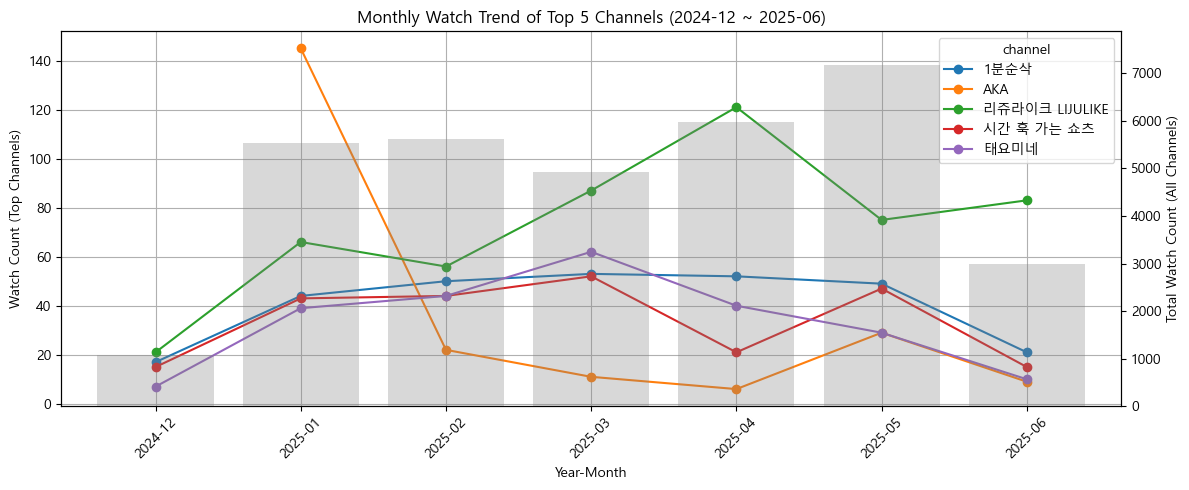

In [8]:
#5.

import matplotlib.pyplot as plt

# Convert datetime to 'YYYY-MM' string format
df['year_month'] = df['time'].dt.to_period('M').astype(str)

# Identify top 5 most watched channels
top_n_channels = df['channel'].value_counts().head(5).index.tolist()

# Calculate the total monthly watch count (all channels)
trend = (
    df[df['channel'].isin(top_n_channels)]
    .groupby(['year_month', 'channel'])
    .size()
    .reset_index(name='count')
    .pivot(index='year_month', columns='channel', values='count')
)

# Visualization
monthly_total = df['year_month'].value_counts().sort_index()


# Graph
fig, ax1 = plt.subplots(figsize=(12, 5))
trend.plot(kind='line', marker='o', ax=ax1)

# (1) Line plot: monthly watch trend of the top 5 channels

ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Watch Count (Top Channels)")
ax1.set_title(f"Monthly Watch Trend of Top 5 Channels ({df['year_month'].min()} ~ {df['year_month'].max()})")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# (2) Bar plot: overall monthly watch count on secondary y-axis
ax2 = ax1.twinx()
monthly_total.plot(kind='bar', color='gray', alpha=0.3, ax=ax2, width=0.8)
ax2.set_ylabel("Total Watch Count (All Channels)")
ax2.set_ylim(0, monthly_total.max() * 1.1)  # 막대 시각화 비율 조정

plt.tight_layout()
plt.show()

In [9]:
# 한글 폰트 깨짐 방지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows 기준 - 맑은 고딕 경로
font_path ='C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

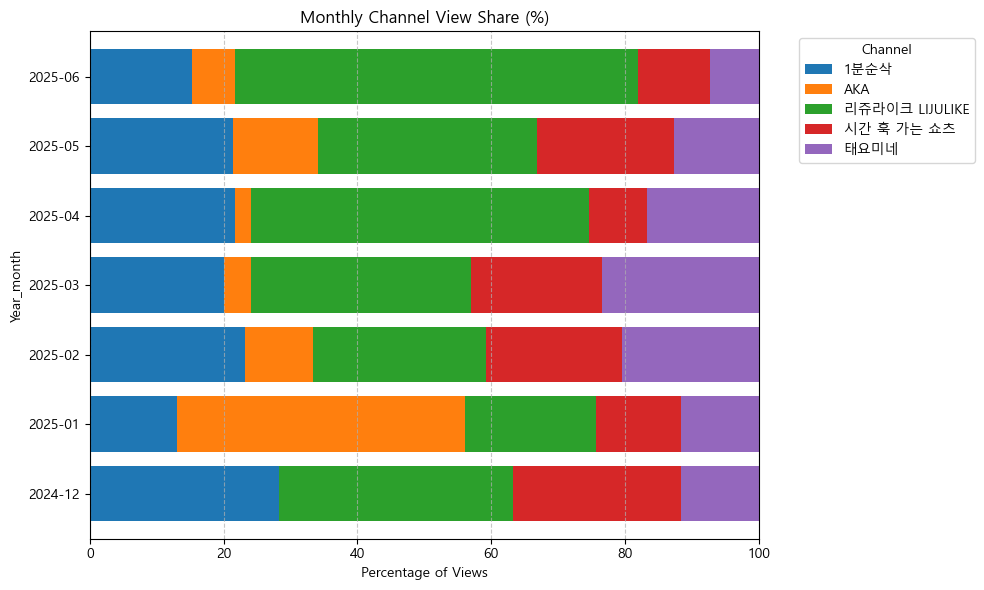

In [10]:
# 6. Stacked Bar Chart

#  Color Match
custom_colors = {
    '1분순삭': '#1f77b4',           # 파랑
    'AKA': '#ff7f0e',              # 주황
    '리쥬라이크 LIJULIKE': '#2ca02c',  # 초록
    '시간 훅 가는 쇼츠': '#d62728',    # 빨강
    '태요미네': '#9467bd'            # 보라
}
color_list = [custom_colors[col] for col in percent_df.columns]

# Visualize the share of views as a horizontal stacked bar
percent_df.plot(
    kind= 'barh',
    stacked=True,
    figsize=(10,6),
    width=0.8,
    color=color_list
)

plt.xlim(0,100)
plt.xlabel('Percentage of Views')
plt.ylabel('Year_month')
plt.title('Monthly Channel View Share (%)')
plt.legend(title='Channel',bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--',alpha=0.7)
plt.show()

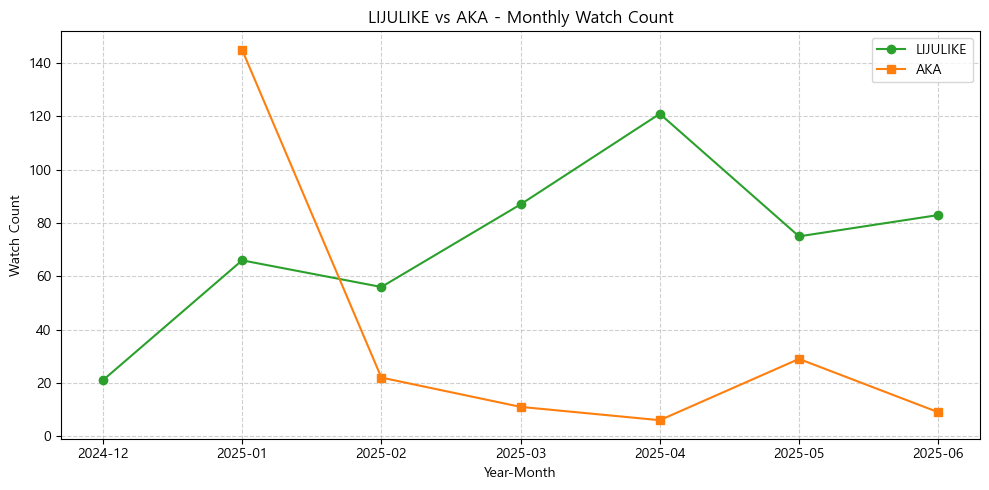

In [11]:
# 7.Focused Trend: LIJULIKE vs AKA

# Compare two key channels
lijulike = df[df['channel'] == '리쥬라이크 LIJULIKE']
aka = df[df['channel'] == 'AKA']

# Group by month
lijulike_monthly = lijulike.groupby('year_month').size()
aka_monthly = aka.groupby('year_month').size()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(lijulike_monthly.index.astype(str), lijulike_monthly.values, marker='o', label='LIJULIKE', color='#2ca02c')
plt.plot(aka_monthly.index.astype(str), aka_monthly.values, marker='s', label='AKA', color='#ff7f0e')

plt.title('LIJULIKE vs AKA - Monthly Watch Count')
plt.xlabel('Year-Month')
plt.ylabel('Watch Count')
plt.legend()
plt.grid(True,linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
         

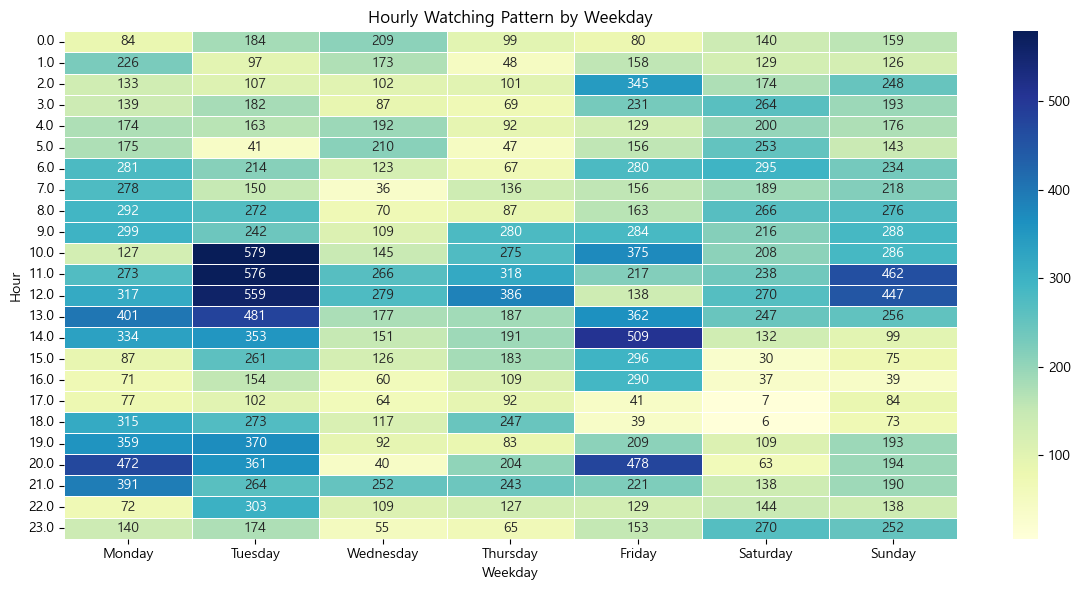

In [12]:
# 8.Weekday + HourHeatmap

import seaborn as sns

# Group by weekday and hour
weekday_hour = df.groupby(['weekday','hour']).size().reset_index(name='count')

# Ensure weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = weekday_hour.pivot_table(index='hour', columns='weekday', values='count', fill_value=0)
heatmap_data = heatmap_data[weekday_order]

#Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Hourly Watching Pattern by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()
